In [154]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# Data preprocessing

In [141]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   699 non-null    int6

(None, None)

In [155]:
X.isna().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

In [156]:
X.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<Axes: xlabel='Bare_nuclei'>

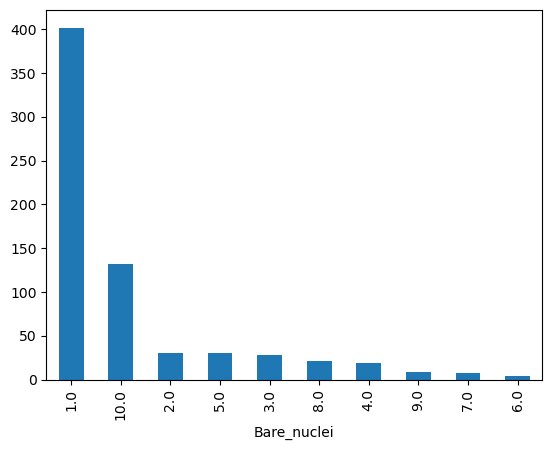

In [142]:
X.Bare_nuclei.value_counts().plot(kind='bar')

In [143]:
flags = (X['Bare_nuclei'].isna())
X.loc[flags, 'Bare_nuclei'] = 1

In [144]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  699 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


## Normalize & split the data for training and testing the neural network 

In [145]:
def normalize(col):
    return (col - col.mean())/col.std(ddof=0) # Standardization

labels = y['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.6,
                                                    random_state=123,
                                                    stratify=labels)

new_X_train = X_train.apply(normalize)
new_X_test = X_test.apply(normalize)

In [157]:
new_X_train.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,4.190000e+02,4.190000e+02,4.190000e+02,4.190000e+02,419.000000,4.190000e+02,4.190000e+02,4.190000e+02,4.190000e+02
mean,1.695806e-16,-4.663467e-17,1.059879e-17,6.571248e-17,0.000000,4.663467e-17,5.511370e-17,7.207176e-17,2.119758e-17
std,1.001195e+00,1.001195e+00,1.001195e+00,1.001195e+00,1.001195,1.001195e+00,1.001195e+00,1.001195e+00,1.001195e+00
min,-1.222019e+00,-6.922095e-01,-7.527212e-01,-6.295596e-01,-0.982446,-6.990264e-01,-9.848284e-01,-6.142446e-01,-3.492607e-01
25%,-8.621975e-01,-6.922095e-01,-7.527212e-01,-6.295596e-01,-0.530089,-6.990264e-01,-5.713583e-01,-6.142446e-01,-3.492607e-01
50%,-1.425546e-01,-6.922095e-01,-4.189750e-01,-6.295596e-01,-0.530089,-6.990264e-01,-1.578883e-01,-6.142446e-01,-3.492607e-01
75%,5.770884e-01,5.954078e-01,5.822637e-01,3.811127e-01,0.374625,4.051849e-01,4.623167e-01,3.533061e-01,-3.492607e-01
max,2.016374e+00,2.204929e+00,2.250995e+00,2.402457e+00,3.088768,1.785449e+00,2.736402e+00,2.288408e+00,5.279210e+00


In [158]:
new_X_test.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02
mean,-6.344132e-17,-3.172066e-18,-1.744636e-17,-1.189525e-17,7.930164e-17,4.758099e-17,3.172066e-17,9.357594e-17,3.330669e-17
std,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00
min,-1.204451e+00,-7.127422e-01,-7.293572e-01,-6.422073e-01,-1.030700e+00,-6.691138e-01,-1.024541e+00,-6.085461e-01,-3.396575e-01
25%,-8.553350e-01,-7.127422e-01,-7.293572e-01,-6.422073e-01,-5.790631e-01,-6.691138e-01,-6.182073e-01,-6.085461e-01,-3.396575e-01
50%,-1.571023e-01,-7.127422e-01,-7.293572e-01,-6.422073e-01,-5.790631e-01,-6.691138e-01,-2.118739e-01,-6.085461e-01,-3.396575e-01
75%,5.411303e-01,6.379706e-01,6.366630e-01,1.070345e-01,3.242108e-01,7.145780e-01,6.007930e-01,1.476354e-01,-3.396575e-01
max,1.937596e+00,2.326362e+00,2.344188e+00,2.729381e+00,3.034033e+00,1.821531e+00,2.632460e+00,2.416180e+00,4.468977e+00


## Export data for training and testing

In [146]:
new_X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

new_X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Create a neural network using OOP

In [148]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.random.randn(1, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.random.randn(1, self.output_size)

    def sigmoid(self, x):
        x = np.clip(x, -100, None)      # Avoid overflow, I have problem when the value is too big
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, inputs):
        # Forward pass through the network
        self.hidden_sum = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_activation = self.sigmoid(self.hidden_sum)
        self.output_sum = np.dot(self.hidden_activation, self.weights_hidden_output) + self.bias_output
        self.output = self.sigmoid(self.output_sum)
        
        self.output = np.where(self.output > 0.5, 4, 2) # Mapping the output (around 0 to 1) to the target values (2 and 4)
        
        return self.output

    def backward_propagation(self, inputs, targets, learning_rate):
        # Backward pass through the network
        output_error = targets - self.output
        output_delta = output_error * self.sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_activation)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_activation.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def mean_squared_error(self, predictions, targets):
        return np.mean(np.square(targets - predictions))

## Define dataloader for dataset as a batches to imporve the training process

In [98]:
# Create DataLoader
def data_loader(df, targets, batch_size=16):
    
    X = df.to_numpy()
    y = targets.to_numpy()

    # Create batches
    batches = [(X[i:i+batch_size], y[i:i+batch_size]) for i in range(0, len(X), batch_size)]
    
    return batches
        
ds_loader = data_loader(new_X_train, y_train)

# Train the neural network

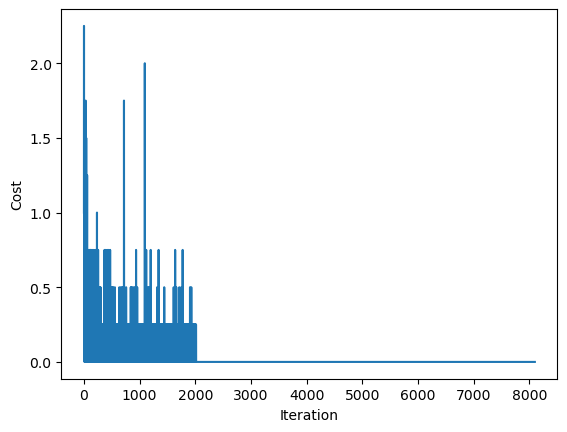

In [150]:
# Assign hyperparameters for the neural network
input_size = 9
hidden_size = 8
output_size = 1

nn = NeuralNetwork(input_size, hidden_size, output_size)

learning_rate = -0.01
epochs = 300

losses = []

for epoch in range(epochs):
    for xb, yb in ds_loader:
        # Forward propagation
        predictions = nn.forward_propagation(xb)

        # Calculate loss
        loss = nn.mean_squared_error(predictions, yb)

        # Backward propagation & update weights and biases
        nn.backward_propagation(xb, yb, learning_rate)
        
        losses.append( loss )

plt.figure()
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Cost');

# Test the neural network and calculate the accuracy

In [152]:
from sklearn.metrics import accuracy_score

ds_loader_test = data_loader(new_X_test, y_test)

y_preds = []
y_trues = []

for xb, yb in ds_loader_test:
    y_pred = nn.forward_propagation(xb)
    y_preds.extend(y_pred)
    y_trues.extend(yb)
    
accuracy = accuracy_score(y_trues, y_preds)
    
print("Prediction accuracy:", accuracy)

Prediction accuracy: 0.95
